# Bitcoin Price evolution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

## Importing the data
The dataset can be downloaded [here](https://www.kaggle.com/mczielinski/bitcoin-historical-data/data).

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


## Data preprocessing

In [3]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_quarter = df.resample('Q-DEC').mean()

In [4]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579
2012-01-01,4.680778,4.680778,4.680778,4.680778,5.861697,27.856539,4.680778
2012-01-02,5.000000,5.000000,5.000000,5.000000,11.566478,57.832389,5.000000
2012-01-03,5.145917,5.145917,5.145917,5.145917,13.506125,68.725391,5.145917
2012-01-04,5.176708,5.228729,5.176708,5.228729,17.221039,91.624089,5.195443


In [5]:
df_month.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579
2012-01-31,6.235412,6.239745,6.231737,6.236086,4.955810,29.527545,6.234949
2012-02-29,5.234146,5.234743,5.231709,5.232306,7.153212,37.120786,5.232734
2012-03-31,4.960839,4.961539,4.953547,4.953967,13.455398,66.445048,4.958308
2012-04-30,4.980709,4.982016,4.979536,4.980802,18.732216,92.674707,4.980866


In [6]:
df_year.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579
2012-12-31,8.235861,8.237899,8.232828,8.234829,15.999879,138.023393,8.235262
2013-12-31,187.434854,187.680482,187.159851,187.425713,14.075649,3207.066913,187.410624
2014-12-31,525.561621,525.951260,525.162220,525.570653,10.588013,5494.560796,525.545201
2015-12-31,272.243195,272.365268,272.109143,272.242608,12.388689,3443.658636,272.232979


In [7]:
df_quarter.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579
2012-03-31,5.482132,5.484037,5.477620,5.479434,8.551545,44.523661,5.480662
2012-06-30,5.327103,5.328204,5.326129,5.327188,18.635100,100.239367,5.327157
2012-09-30,10.028060,10.031320,10.024212,10.027483,17.580817,173.436483,10.027933
2012-12-31,12.044599,12.046474,12.041808,12.043656,19.179737,232.467066,12.043745


## Plots

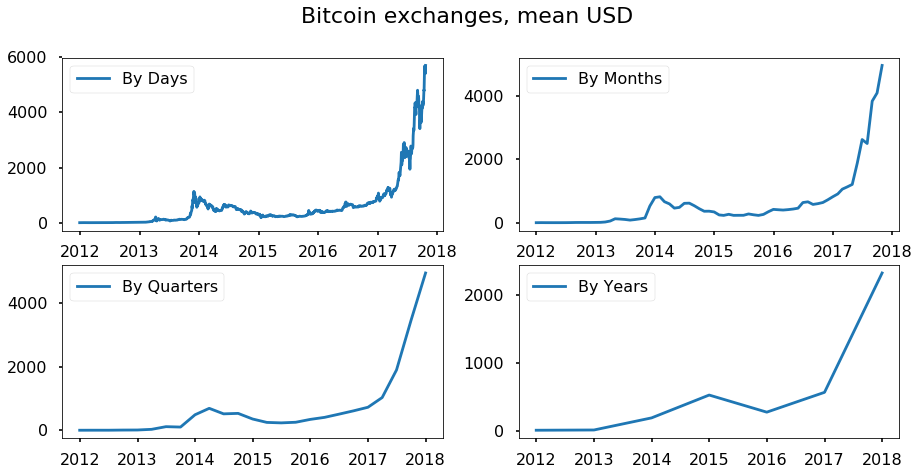

In [10]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quarter.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

# API access to Coinbase
Documentation on the API is available [here](https://github.com/coinbase/coinbase-python).

In [12]:
from coinbase.wallet.client import Client

import os
API_KEY = os.environ['API_KEY_CB']
API_SECRET = os.environ['API_SECRET_CB']
client = Client(API_KEY, API_SECRET)

In [ ]:
user = client.get_current_user()
user_as_json_string = json.dumps(user)

In [ ]:
exchange_rates = client.get_exchange_rates()
exchange_rates_as_json_string = json.dumps(exchange_rates)